# 线性回归从零开始

In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print(torch.__version__)

1.0.1


## 生成数据集

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                      dtype=torch.float32)
# Inputs/features(1000,2)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
# label(1000,1)

In [3]:
print(features[0], labels[0])

tensor([ 1.1959, -0.3304]) tensor(7.7096)


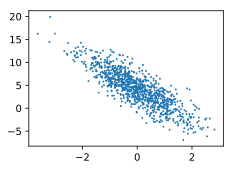

In [4]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

# 读取数据

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield features.index_select(0, j), labels.index_select(0, j)

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.1185, -0.1401],
        [-1.3608,  1.7204],
        [-0.3440,  0.3281],
        [ 1.4241, -0.2994],
        [ 0.6298, -0.1121],
        [ 0.4366, -0.5366],
        [-1.0300, -0.0282],
        [ 0.7787,  0.7791],
        [ 0.5438,  1.2623],
        [-0.2493, -0.1409]]) 
 tensor([ 2.4349, -4.3638,  2.3681,  8.0808,  5.8332,  6.9089,  2.2225,  3.1154,
         0.9925,  4.1579])


## 初始化模型参数

In [7]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [8]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

## 定义模型

In [9]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

## 定义损失函数

In [10]:
def squared_loss(y_hat, y):  
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 定义优化算法

In [11]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

## 训练模型

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum() # l是有关小批量X和y的损失值
        l.backward() # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使用小批量随机梯度下降迭代模型参数
        
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss%f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss0.036834
epoch 2, loss0.000133
epoch 3, loss0.000053


In [13]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9994],
        [-3.4001]], requires_grad=True)
4.2 
 tensor([4.1994], requires_grad=True)
